In [62]:
x <- read.csv("toy.csv")[,2]

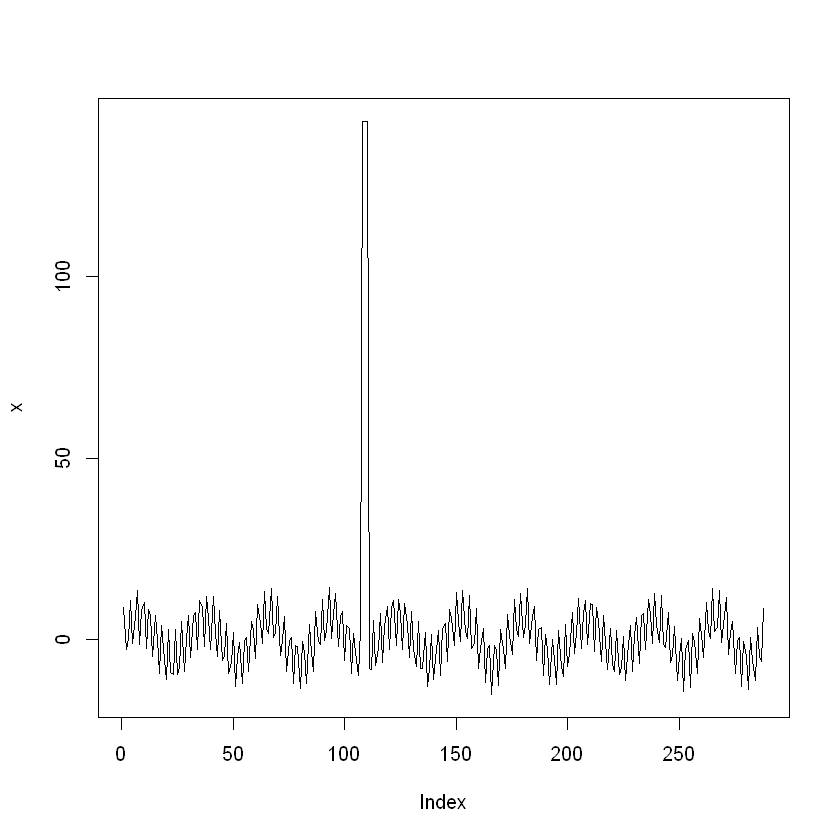

In [14]:
plot(x,type="l")

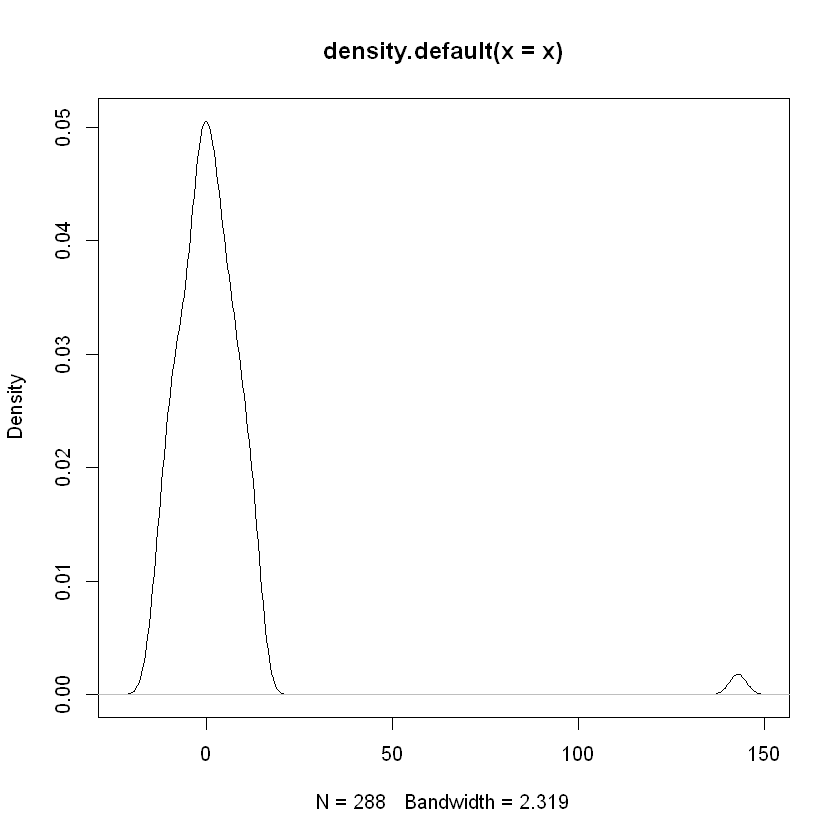

In [70]:
plot(density(x))

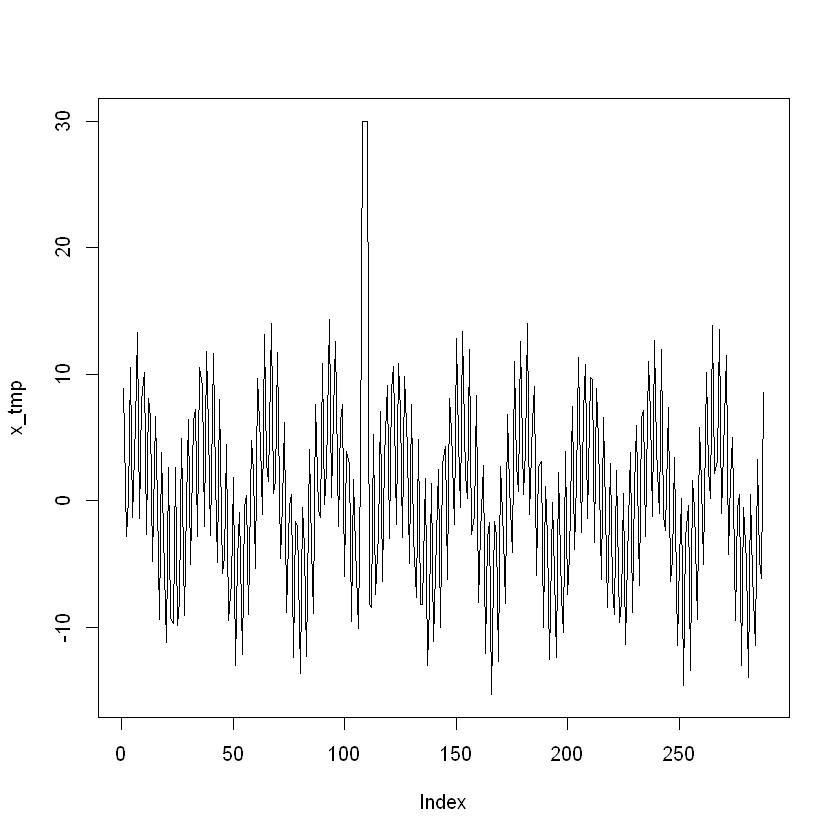

In [116]:
x_tmp <- x
x_tmp[which(x_tmp>100)] <- 30
plot(x_tmp, type="l")

In [152]:
sigmaCalculate <- function(term, n, input) {
  mat <- matrix(input, nrow=term)
  ret <- NULL
  for(i in 1:length(mat[,1])){
    row <- mat[i,]
    sd <- sd(row)
    mean <- mean(row)
    range_r <- mean + n * sd
    range_l <- mean - n * sd
    tmp <- c(range_r, range_l)
    ret <- rbind(ret,tmp)
  }
  sigma_ranges <- data.frame(right=ret[,1],left=ret[,2])
  
  term_counter <- 1
  ret_final <- NULL
  for(v in input){
    a_row <- data.frame(value=v, sigma_ranges[term_counter,])
    if(term_counter == term){
      term_counter <- 1
    }else{
      term_counter <- term_counter + 1
    }
    ret_final <- rbind(ret_final, a_row)
  }
  
  class <- NULL
  for(i in 1:nrow(ret_final)){
    row <- ret_final[i,]
    if(row[,1] > row[,2] || row[,1] < row[,3]){
      class_ <- 2
    }else{
      class_ <- 1
    }
    class <- c(class, class_)
  }
  result <- data.frame(ret_final, class)

  return(result)
}

In [153]:
obj <- function (param) {
  #define anomaly ratio
  trg_level <- 95
  func_out <- sigmaCalculate(50,param,x_tmp)
  trg <- 1 - trg_level/100
  a.ratio <- length(which(func_out$class==2)) / length(func_out$class)
  #return residual
  resi <- abs(trg - a.ratio)
  return(resi)
}

In [154]:
ret  <-optim(optim(0.5, obj,control = list(maxit=10), method = "SANN")$par,
             lower=1, upper=4,
             obj,control = list(maxit = 100000),
method = "L-BFGS-B")

Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "Warning message in matrix(input, nrow = term):
" データ長 [288] 

In [155]:
ret

$par
[1] 1.783407

$value
[1] 0.02222222

$counts
function gradient 
       4        4 

$convergence
[1] 0

$message
[1] "CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL"

Warning message in matrix(input, nrow = term):
" データ長 [288] が行数 [50] を整数で割った、もしくは掛けた値ではありません "

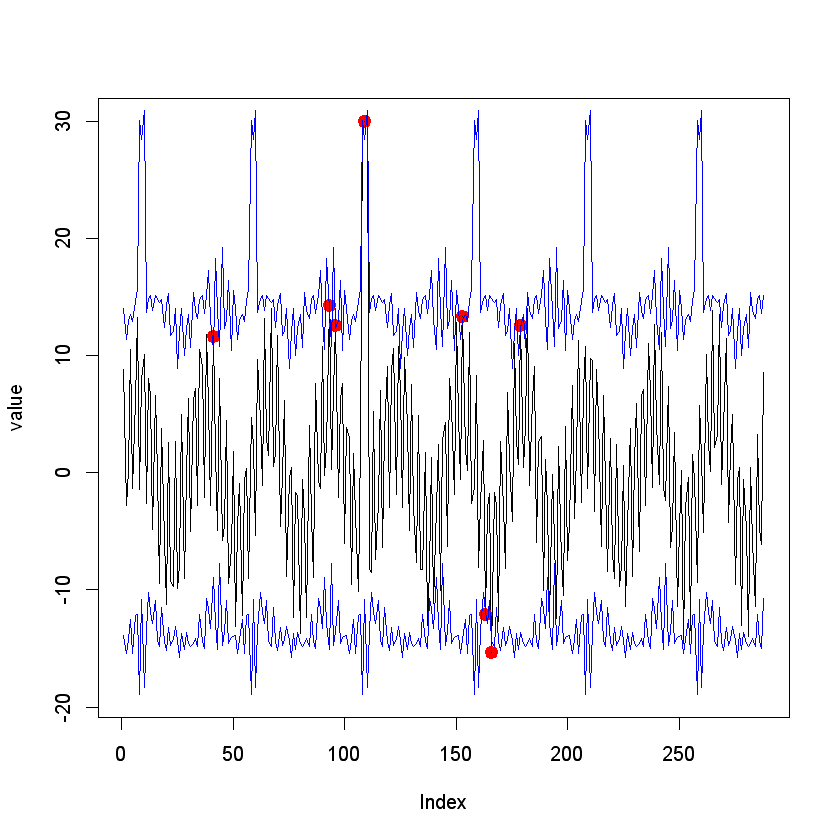

In [156]:
result <- sigmaCalculate(50,ret$par,x_tmp)
plot(result$value,type="l",ylab = "value",ylim=c(min(result$left), max(result$value)))
points(which(result$class==2), result$value[which(result$class==2)],col=2, lwd=5)
par(new=T)
plot(result$right,type="l", col=4,ylim=c(min(result$left), max(result$value)),ylab = "")
par(new=T)
plot(result$left,type="l", col=4,ylim=c(min(result$left), max(result$value)), ylab = "")